This is the code for Dr. Pat Mooney's Particle Physics Projects as Dr. Mooney orgainally wrote it in python.

Download the data from the
[dimuon2K](https://www.dropbox.com/s/xb2sk4u24zk2eue/dimuon2K.csv?dl=0) Google sheet as a .csv file.

Run the code block below and be prepared to upload the dimuon2K.csv file.

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul  5 14:30:50 2020

@author: pmooney
"""

# import libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import files

# clear figures
plt.clf()

# upload data file
uploaded = files.upload()

Saving dimuon2K.csv to dimuon2K (3).csv


<Figure size 432x288 with 0 Axes>

['MuQuality', 'Event_Number', 'E1  (GeV)', 'px1  (GeV/c)', 'py1  (GeV/c)', 'pz1  (GeV/c)', 'Q1', 'E2  (GeV)', 'px2  (GeV/c)', 'py2  (GeV/c)', 'pz2  (GeV/c)', 'Q2']
GT [ 1.00807598e+09  1.35527000e+01  1.18694000e+00 -2.35966000e+00
 -1.32924000e+01  1.00000000e+00  4.36207000e+00  1.19082000e+00
  1.42888000e-01 -4.19262000e+00  1.00000000e+00]


Text(0.5, 0, 'pz2 (GeV/c)')

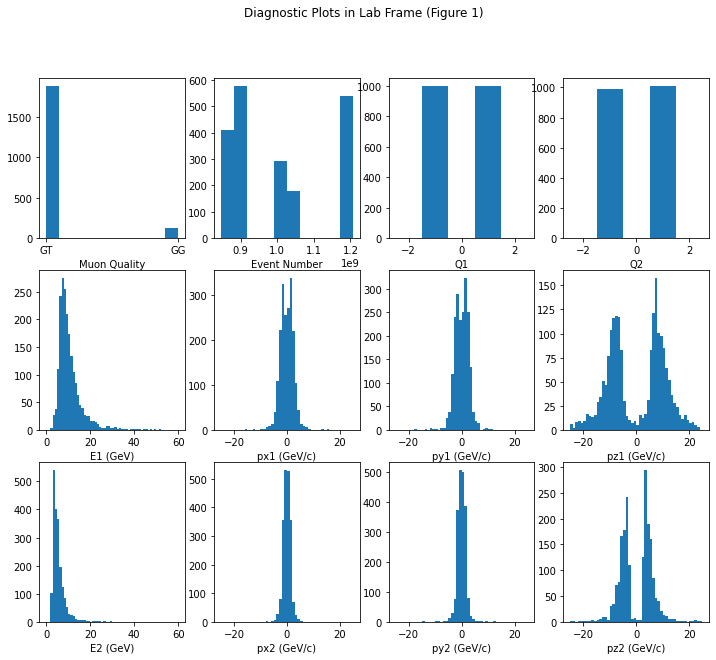

In [ ]:
# open and read file
filename = 'dimuon2K.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    print(header_row)
    # get all the rows as a list
    data = list(reader)

# transform data into numpy array
data = np.array(data)
data0 = data[:, 0]
data1 = data[:, 1:]
data1 = np.array(data1).astype(float)

# determine the number of events
n_evt = len(data0)
n_evt_m1 = n_evt - 1

# initialize arrays
Esys = np.zeros((n_evt, 1), dtype=np.float)
Psys = np.zeros((n_evt, 1), dtype=np.float)
Msys = np.zeros((n_evt, 1), dtype=np.float)
P3sys = np.zeros((n_evt, 3), dtype=np.float)
P3sys_evt = np.zeros((3), dtype=np.float)
M_all = np.zeros((n_evt, 1), dtype=np.float)
M_opp = np.zeros((n_evt, 1), dtype=np.float)
M_opp_GT_GG = np.zeros((n_evt, 1), dtype=np.float)
M_opp_GG = np.zeros((n_evt, 1), dtype=np.float)
B3sys = np.zeros((n_evt, 3), dtype=np.float)

# set up physics variables
mu_q = data0
ev_n = data1[:, 0]
p4mu1 = data1[:, 1:5]
q1 = data1[:, 5]
p4mu2 = data1[:, 6:10]
q2 = data1[:, 10]

# print 5th event
print(f"{data0[4]} {data1[4, :]}")

# set bin size for histograms
xE = np.linspace(0, 60, num=61)
xP = np.linspace(-25, 25, num=51)
xQ = np.linspace(-2.5, 2.5, num=6)
xEsys = np.linspace(1, 80, num=81)
xPsys = np.linspace(1, 60, num=61)
xM = np.linspace(1, 6, num=126)
xERF = np.linspace(0.5, 3, num=51)
xPRF = np.linspace(-3, 3, num=61)

# create and display diagnostic histograms
fig = plt.figure(1, figsize=[12,10])
#fig.tight_layout(pad=5.0)
fig.suptitle('Diagnostic Plots in Lab Frame (Figure 1)')
plt.subplot(3, 4, 1)
plt.hist(mu_q)
plt.xlabel('Muon Quality')
plt.subplot(3, 4, 2)
plt.hist(ev_n[:])
plt.xlabel('Event Number')
plt.subplot(3, 4, 3)
plt.hist(q1, xQ)
plt.xlabel('Q1')
plt.subplot(3, 4, 4)
plt.hist(q2, xQ)
plt.xlabel('Q2')
plt.subplot(3, 4, 5)
plt.hist(p4mu1[:, 0], xE)
plt.xlabel('E1 (GeV)')
plt.subplot(3, 4, 6)
plt.hist(p4mu1[:, 1], xP)
plt.xlabel('px1 (GeV/c)')
plt.subplot(3, 4, 7)
plt.hist(p4mu1[:, 2], xP)
plt.xlabel('py1 (GeV/c)')
plt.subplot(3, 4, 8)
plt.hist(p4mu1[:, 3], xP)
plt.xlabel('pz1 (GeV/c)')
plt.subplot(3, 4, 9)
plt.hist(p4mu2[:, 0], xE)
plt.xlabel('E2 (GeV)')
plt.subplot(3, 4, 10)
plt.hist(p4mu2[:, 1], xP)
plt.xlabel('px2 (GeV/c)')
plt.subplot(3, 4, 11)
plt.hist(p4mu2[:, 2], xP)
plt.xlabel('py2 (GeV/c)')
plt.subplot(3, 4, 12)
plt.hist(p4mu2[:, 3], xP)
plt.xlabel('pz2 (GeV/c)')

Text(0.5, 0, 'Msys (GeV/c**2)')

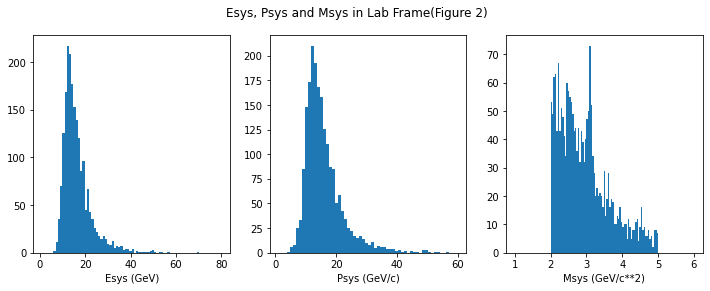

In [ ]:
# calculate esys, psys (magnitude of 3 momentum) and msys
for ie in range(0, n_evt):
    Esys[ie, 0] = p4mu1[ie, 0] + p4mu2[ie, 0]
    P3sys[ie, 0:3] = [p4mu1[ie, 1] + p4mu2[ie, 1], p4mu1[ie, 2] + p4mu2[ie, 2],
                      p4mu1[ie, 3] + p4mu2[ie, 3]]
    P3sys_evt[0:3] = P3sys[ie, 0:3]
    Psys[ie, 0] = np.sqrt(np.inner(P3sys_evt, P3sys_evt))
    Msys[ie, 0] = math.sqrt((Esys[ie, 0])**2-(Psys[ie, 0])**2)

# histogram esys, psys (magnitude of 3 momentum) and msys
fig = plt.figure(2,  figsize=[12,4])
fig.suptitle('Esys, Psys and Msys in Lab Frame(Figure 2)')
plt.subplot(1, 3, 1)
plt.hist(Esys, xEsys)
plt.xlabel('Esys (GeV)')
plt.subplot(1, 3, 2)
plt.hist(Psys, xPsys)
plt.xlabel('Psys (GeV/c)')
plt.subplot(1, 3, 3)
plt.hist(Msys, xM)
plt.xlabel('Msys (GeV/c**2)')

Text(0.5, 0, 'M_opp_GG (GeV/c**2)')

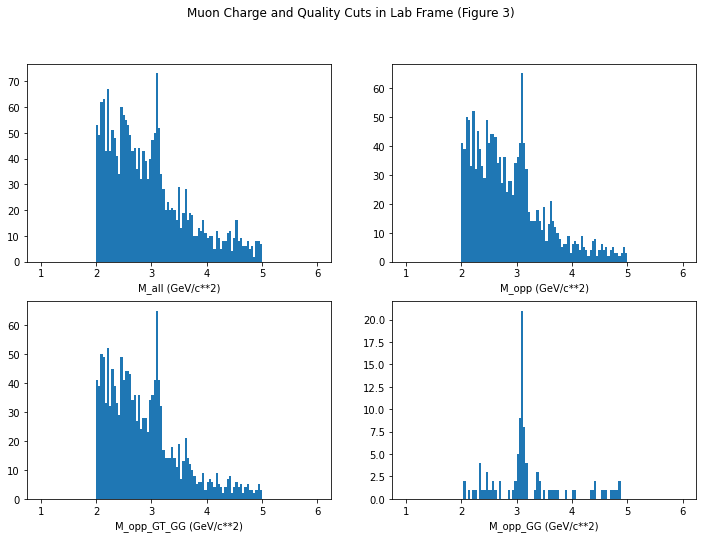

In [ ]:
# select events based on the charge and muon quality
for ie in range(0, n_evt):
    M_all[ie, 0] = Msys[ie, 0]
    if ((q1[ie] * q2[ie]) < 0):
        M_opp[ie, 0] = Msys[ie, 0]
    if ((q1[ie] * q2[ie]) < 0) and (mu_q[ie] != 'TT'):
        M_opp_GT_GG[ie, 0] = Msys[ie, 0]
    if ((q1[ie] * q2[ie]) < 0) and (mu_q[ie] == 'GG'):
        M_opp_GG[ie, 0] = Msys[ie, 0]

# histogram mass plots with muon charge and muon quality selections (cuts)
fig = plt.figure(3,  figsize=[12,8])
fig.suptitle('Muon Charge and Quality Cuts in Lab Frame (Figure 3)')
plt.subplot(2, 2, 1)
plt.hist(M_all, xM)
plt.xlabel('M_all (GeV/c**2)')
plt.subplot(2, 2, 2)
plt.hist(M_opp, xM)
plt.xlabel('M_opp (GeV/c**2)')
plt.subplot(2, 2, 3)
plt.hist(M_opp_GT_GG, xM)
plt.xlabel('M_opp_GT_GG (GeV/c**2)')
plt.subplot(2, 2, 4)
plt.hist(M_opp_GG, xM)
plt.xlabel('M_opp_GG (GeV/c**2)')

Text(0.5, 0, 'pz2 (GeV/c)')

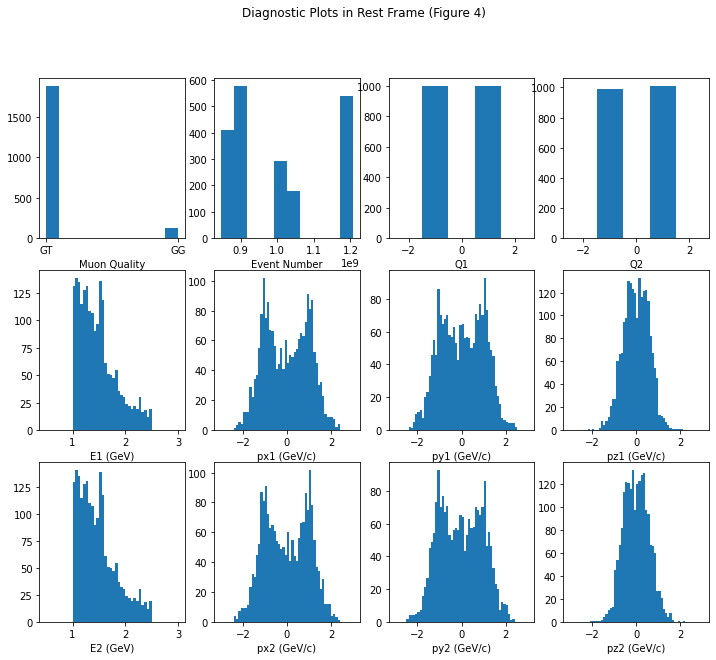

In [ ]:
# TRANSFORM to REST FRAME of CANDIDATE J/Psi

# Loop over all the events

for ie in range(0, n_evt):
    # determine velocity of candidate J/Psi
    B3sys[ie, :] = P3sys[ie, :]/Esys[ie, 0]
    Bx = B3sys[ie, 0]
    By = B3sys[ie, 1]
    Bz = B3sys[ie, 2]
    B = np.sqrt(Bx**2 + By**2 + Bz**2)
    gam = 1/np.sqrt(1 - B**2)

    # create Lorentz Transformation matrix
    L = [[ gam,          -gam*Bx,               -gam*By,             -gam*Bz],
         [-gam*Bx,1+(gam-1)*(Bx*Bx)/B**2,  (gam-1)*(Bx*By)/B**2,  (gam-1)*(Bx*Bz)/B**2],
         [-gam*By,  (gam-1)*(By*Bx)/B**2,1+(gam-1)*(By*By)/B**2,  (gam-1)*(By*Bz)/B**2],
         [-gam*Bz,  (gam-1)*(Bz*Bx)/B**2,  (gam-1)*(Bz*By)/B**2,1+(gam-1)*(Bz*Bz)/B**2]]
    
    # transform p4mu1 and p4mu2 to rest frame of J/Psi candidate
    p4mu1[ie, 0:4] = np.transpose(L@np.transpose(p4mu1[ie, 0:4]))
    p4mu2[ie, 0:4] = np.transpose(L@np.transpose(p4mu2[ie, 0:4]))

# duplicate calculations and histograms in J/Psi candidate rest frame

# create and display diagnostic histograms
fig = plt.figure(4, figsize=[12,10])
fig.suptitle('Diagnostic Plots in Rest Frame (Figure 4)')
plt.subplot(3, 4, 1)
plt.hist(mu_q)
plt.xlabel('Muon Quality')
plt.subplot(3, 4, 2)
plt.hist(ev_n[:])
plt.xlabel('Event Number')
plt.subplot(3, 4, 3)
plt.hist(q1, xQ)
plt.xlabel('Q1')
plt.subplot(3, 4, 4)
plt.hist(q2, xQ)
plt.xlabel('Q2')
plt.subplot(3, 4, 5)
plt.hist(p4mu1[:, 0], xERF)
plt.xlabel('E1 (GeV)')
plt.subplot(3, 4, 6)
plt.hist(p4mu1[:, 1], xPRF)
plt.xlabel('px1 (GeV/c)')
plt.subplot(3, 4, 7)
plt.hist(p4mu1[:, 2], xPRF)
plt.xlabel('py1 (GeV/c)')
plt.subplot(3, 4, 8)
plt.hist(p4mu1[:, 3], xPRF)
plt.xlabel('pz1 (GeV/c)')
plt.subplot(3, 4, 9)
plt.hist(p4mu2[:, 0], xERF)
plt.xlabel('E2 (GeV)')
plt.subplot(3, 4, 10)
plt.hist(p4mu2[:, 1], xPRF)
plt.xlabel('px2 (GeV/c)')
plt.subplot(3, 4, 11)
plt.hist(p4mu2[:, 2], xPRF)
plt.xlabel('py2 (GeV/c)')
plt.subplot(3, 4, 12)
plt.hist(p4mu2[:, 3], xPRF)
plt.xlabel('pz2 (GeV/c)')

Text(0.5, 0, 'Msys (GeV/c**2)')

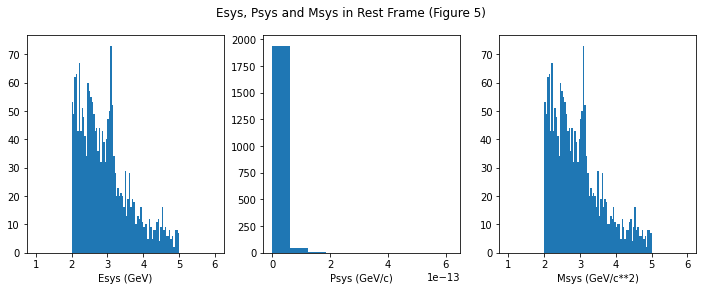

In [ ]:
# calculate esys, psys (magnitude of 3 momentum) and msys
for ie in range(0, n_evt):
    Esys[ie, 0] = p4mu1[ie, 0] + p4mu2[ie, 0]
    P3sys[ie, 0:3] = [p4mu1[ie, 1] + p4mu2[ie, 1], p4mu1[ie, 2] + p4mu2[ie, 2],
                      p4mu1[ie, 3] + p4mu2[ie, 3]]
    P3sys_evt[0:3] = P3sys[ie, 0:3]
    Psys[ie, 0] = np.sqrt(np.inner(P3sys_evt, P3sys_evt))
    Msys[ie, 0] = math.sqrt((Esys[ie, 0])**2-(Psys[ie, 0])**2)

# histogram esys, psys (magnitude of 3 momentum) and msys
fig = plt.figure(5, figsize=[12,4])
fig.suptitle('Esys, Psys and Msys in Rest Frame (Figure 5)')
plt.subplot(1, 3, 1)
plt.hist(Esys, xM)
plt.xlabel('Esys (GeV)')
plt.subplot(1, 3, 2)
plt.hist(Psys)
plt.xlabel('Psys (GeV/c)')
plt.subplot(1, 3, 3)
plt.hist(Msys, xM)
plt.xlabel('Msys (GeV/c**2)')

Text(0.5, 0, 'M_opp_GG (GeV/c**2)')

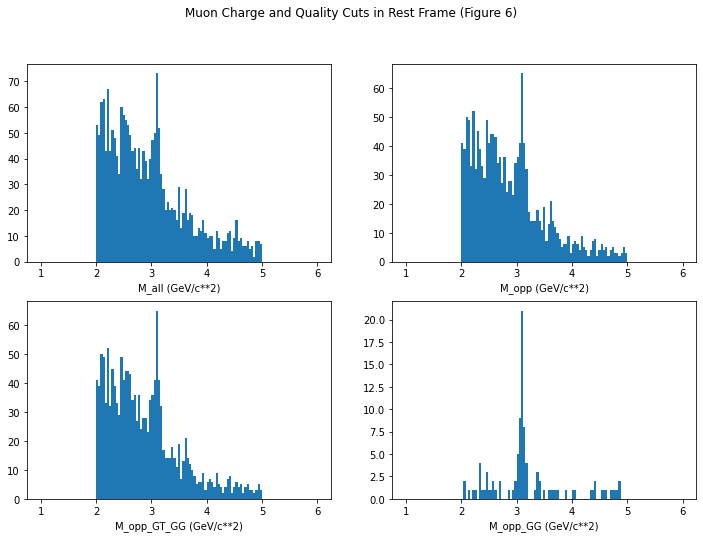

In [ ]:
# select events based on the charge and muon quality
for ie in range(0, n_evt):
    M_all[ie, 0] = Msys[ie, 0]
    if ((q1[ie] * q2[ie]) < 0):
        M_opp[ie, 0] = Msys[ie, 0]
    if ((q1[ie] * q2[ie]) < 0) and (mu_q[ie] != 'TT'):
        M_opp_GT_GG[ie, 0] = Msys[ie, 0]
    if ((q1[ie] * q2[ie]) < 0) and (mu_q[ie] == 'GG'):
        M_opp_GG[ie, 0] = Msys[ie, 0]

# histogram mass plots with muon charge and muon quality selections (cuts)
fig = plt.figure(6, figsize=[12,8])
fig.suptitle('Muon Charge and Quality Cuts in Rest Frame (Figure 6)')
plt.subplot(2, 2, 1)
plt.hist(M_all, xM)
plt.xlabel('M_all (GeV/c**2)')
plt.subplot(2, 2, 2)
plt.hist(M_opp, xM)
plt.xlabel('M_opp (GeV/c**2)')
plt.subplot(2, 2, 3)
plt.hist(M_opp_GT_GG, xM)
plt.xlabel('M_opp_GT_GG (GeV/c**2)')
plt.subplot(2, 2, 4)
plt.hist(M_opp_GG, xM)
plt.xlabel('M_opp_GG (GeV/c**2)')